<h1> <center> Ejercicio en clase </center> </h1>
<p> El siguiente ejercicio en clase busca abordar un problema de clasificación con el uso de las distintas técnicas vistas en clase, para ello presentamos a continuación desde la exploración de la información, balanceo de los datos, hasta las distintas aproximaciones y comparaciones entre los modelos. </p>
<p> Cada sección posee una serie de ejercicios que usted tendrá que solucionar, por el momento no se preocupe, que lo realizaremos como equipo </p>

## Ejercicio
En este ejercicio buscamos detectar si una operación es un fraude o no, para ello utilizaremos distintas técnicas que nos permitan aproximarnos a la respuesta

## Base de datos
En este ejercicio seleccionaremos una base de datos denominada como ```credit```, la cual contienen las transacciones realizadas en dos días con tarjetas de crédito en septiembre de 2013 en Europa. En estos datos se identifican 492 fraudes de 284,807 transacciones. El conjunto de datos está altamente desequilibrado, pues la clase positiva (fraudes) representa el 0.172% de todas las transacciones.

Por temas de confidencialidad esta base de datos contiene información anonimizada con PCA,  (V1,...,V28), exceptuando las características  ```Tiempo``` y ```Cantidad```. La variable ```Tiempo``` contiene los segundos transcurridos entre cada transacción, mientras que la variable ```Cantidad``` es la Cantidad de la transacción, mientras que la variable ```Clase``` es la variable de respuesta y toma el valor 1 en caso de fraude y 0 en caso contrario.

Esta base de datos la puede encontrar en el siguiente [link](https://www.kaggle.com/mlg-ulb/creditcardfraud)

In [19]:
# Classic and data manipulation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Data manipulation with scikit learning
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler

# Models
import statsmodels.api as sm2
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics and hyperparameters
#from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score, roc_curve 

## Exploración de la base de datos
Comencemos con una exploración básica de la información de créditos


In [5]:
dataset = pd.read_csv('credit.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758743e-12,-8.252298e-13,-9.636929e-13,8.316157e-13,1.591952e-13,4.247354e-13,-3.050180e-13,8.693344e-14,-1.179712e-12,...,-3.406543e-13,-5.713163e-13,-9.725303e-13,1.464139e-12,-6.989087e-13,-5.615260e-13,3.332112e-12,-3.518886e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
dataset.isnull().sum().sum()

0

In [14]:
dataset.Class.value_counts(normalize=True)
#email_spam['spam'].value_counts()
#email_spam.spam.value_counts()

0    0.998273
1    0.001727
Name: Class, dtype: float64

### Ejercicio
Realice una tabla en la que calcule el porcentaje de clases 0 y 1 que tenemos en la base de datos

In [0]:
# Escriba aquí su código

Text(0.5, 1.0, 'Distribución de Fraude')

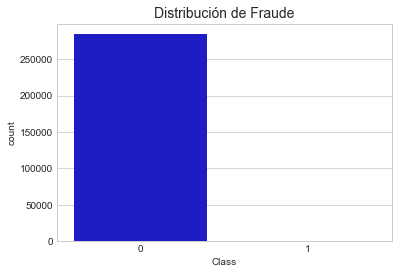

In [0]:
colors = ["#0101DF", "#DF0101"]
sns.countplot('Class', data=dataset, palette=colors)
plt.title('Distribución de Fraude', fontsize=14)

Es claro que nuestra base se encuentra desbalanceada, es decir, tenemos muy poca información para identificar patrones de fraude en las transacciones

### Escalar / Estandarizar

Para poder manejar las distintas variables en una misma escala un camino consiste en la estandarización de la información

In [15]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

dataset['scaled_amount'] = std_scaler.fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset['scaled_time'] = std_scaler.fit_transform(dataset['Time'].values.reshape(-1,1))

dataset.drop(['Time','Amount'], axis=1, inplace=True)
scaled_amount = dataset['scaled_amount']
scaled_time = dataset['scaled_time']

dataset.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
dataset.insert(0, 'scaled_amount', scaled_amount)

dataset.head()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### Balanceo de la base de datos
Para este caso, existen múltiples soluciones, entre ellas:
1. No tener en cuenta las métricas de precisión y puntajes F1 a la hora de validar los modelos
2. Trabajar con algoritmos adecuados - Random Forest
3. Trabajar con técnicas de remuestreo que aumente o disminuyan la información
4. Generación de muestras sintéticas

En este ejercicio se mostraran las distintas técnicas, pero solo se trabajara con una de ellas, como ejercicio usted deberá seleccionar la muestra que mejor se adecue a lo que está buscando



#### Reducción de la muestra de la clase dominante con remuestreo



In [16]:
df = dataset.sample(frac=1)

df_fraude = df.loc[df['Class'] == 1]
df_n_fraude = df.loc[df['Class'] == 0][:492]

df_tamaño = pd.concat([df_fraude, df_n_fraude])
df = df_tamaño.sample(frac=1, random_state=42)

df.Class.value_counts()

1    492
0    492
Name: Class, dtype: int64

In [17]:
df_fraude = dataset.loc[dataset['Class'] == 1]
df_n_fraude = dataset.loc[dataset['Class'] == 0]

df_n_fraude = resample(df_n_fraude,
                       replace = False,
                       n_samples = len(df_fraude),
                       random_state = 27)

df2 = pd.concat([df_n_fraude, df_fraude])

df2.Class.value_counts()

1    492
0    492
Name: Class, dtype: int64

#### Aumento de la muestra de la clase no dominante con remuestreo

In [21]:
y = dataset.Class
X = dataset.drop('Class', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)
X = pd.concat([X_train, y_train], axis=1)
df_n_fraude = X[X.Class==0]
df_fraude = X[X.Class==1]

df3 = resample(df_fraude,
               replace=True,
               n_samples=len(df_n_fraude),
               random_state=27)

df3 = pd.concat([df_n_fraude, df3])

df3.Class.value_counts()

1    213245
0    213245
Name: Class, dtype: int64

#### Balanceo con muestra sintentica
Esta técnica busca un submuestre de la información con los vecinos más cercanos

In [24]:
y = dataset.Class
X = dataset.drop('Class', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)
sm = SMOTE(random_state=27)#, ratio=1.0
X_train, y_train = sm.fit_sample(X_train, y_train)
np.array(np.unique(y_train, return_counts=True)).T

array([[     0, 213245],
       [     1, 213245]], dtype=int64)

## Entrenamiento con distintos modelos

Al tener balanceada nuestra información balanceada, procederemos a evaluar los distintos modelos y seleccionar aquel que mejor resultado nos arroje

### Estimación (Tuning) de los Hiperparametros
Los hiperparametros son instancias que permite la parametrización del modelo a una función objetivo, por ejemplo la cantidad de ramificaciones que tendrá un modelo, el número mínimo de nodos, entre otros casos

Existen múltiples caminos para hallar los hiperparametros más adecuados a la hora de realizar modelación, entre ellos tenemos:
1. Busqueda de cuadricula: Probar todas las combinaciones posibles
2. Busqueda aleatoria: Probar combinaciones aleatorias
3. Optimización Bayesiana:  Trata de encontrar el valor que minimiza una función objetivo mediante la construcción de un modelo de probabilidad basado en resultados de evaluaciones anteriores de la métrica objetiva

Todo lo anterior es basado en la metrica de ```exactitud``` la cual busca encontrar cual fue el porcenta de datos predichos.

### Modelo de regresión logística
Una regresión logistica se basa en la idea de la regresión lineal, salvo que ajusta el resultado en un número entre 0 y 1. Así entre las funciones más utilizadas se tiene la función sigmoide, la cual establece:

$$\sigma \left ( x \right ) = {\displaystyle \frac{1}{1+e^{-x}}}$$

Esrta también se conoce como la función de distribución acumulada de una regresión logistica. Si $x = \beta_{0}+\beta_{1}x_{1}$, entonces: 

$$ \sigma \left ( x \right ) = {\displaystyle \frac{1}{1+e^{-\beta_{0}-\beta_{1}x_{1}}}}$$

Entonces, si tomamos la pendiente de la curva, tenemos

$${\displaystyle \frac{\partial p_{i}}{\partial x_{i}}=\beta p_{i}\left(1-p_{i}\right)}$$

Esto se conoce como el efecto marginal de $x$ en un evento de probabilidad
Por ejemplo, cuando $\beta = 1$ y $p = 0.5$, un aumento de $1$ unidad en $x$ produce un aumento de $0.25$ en la probabilidad de ocurrencia de un evento. Cuando $\beta$ es más grande, la pendiente de la curva en forma de S y con $p = 0.5$ es más pronunciada. Cuando $\beta$ es negativo, la curva se voltea horizontalmente para que $p$ esté cerca de $1$ cuando $x$ es pequeño y cerca de 0 cuando $x$ es grande. 

In [0]:
logit = LogisticRegression(solver='lbfgs')
logit_model = logit.fit(X_train,y_train)
logit_pred = logit_model.predict(X_test)
logit_roc_auc = roc_auc_score(y_test, logit_pred)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


### Naïve Bayes

Este algoritmo simple esta basado en el Teorema de Bayes. Este asume que el efecto de una característica particular en una clase es independiente de otras características
$$ P(h|D) = \frac{P(D|h)P(D)}{P(h)}$$

Supone independencia entre los predictores, conocido como interdependencia condicional de clase, esto lo hace ingenuo

$P(h):$ probabilidad de que la hipótesis h sea cierta (independientemente de los datos). Esto se conoce como la probabilidad previa de h.
<br/>
$P(D):$ probabilidad de los datos (independientemente de la hipótesis). Esto se conoce como probabilidad previa.

$P(D|h):$ probabilidad de los datos D, dado h.
<br/>
$P(h|D):$ probabilidad de que la hipótesis h dado un conjunto de datos D


In [0]:
def hyperopt_train_test(params):
    clf = BernoulliNB(**params)
    return cross_val_score(clf, X_train, y_train).mean()
space4knn = {
    'alpha': hp.uniform('alpha', 0.0, 2.0)
}

def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}
trials = Trials()
best = fmin(f, space4knn, algo=tpe.suggest, max_evals=10, trials=trials)
print('best:')
print(best)

In [0]:
NaiveBayes = BernoulliNB(alpha=0.13054847911498313)
NB_model = NaiveBayes.fit(X_train,y_train)
NB_pred = NB_model.predict(X_test)
NB_roc_auc = roc_auc_score(y_test, NB_pred)
print(1)

1


### K Nearest Neighbor

<p>Este es un algoritmo simple con el que se pueden abordar problemas de reconocimiento de patrones, minería de datos/texto, detección de intrusos, entre otros, en el que el conjunto de datos puede ser no paramétrico (No hay suposición explicita sobre la forma funcional de los datos) y este algoritmos esta basado en instancias, es decir, el algoritmo no aprende directamente del modelo, sino de las instancias de información, que son utilizadas como "conocimiento" para poder clasificar los datos nuveos.

El algoritmo funciona de la siguiente manera:
1. Se selecciona el punto en el que se encuentra el registro al cual se le va a realizar la predicción
2. Dado un hiperparametro ```k```, que se entiende el número de vecinos por cada grupo,  se seleccionan los vecinos más cercanos a este punto usando las siguientes medidas:
    1. Distancia Euclidiana
    2. Distancia Manhattan
    3. Distancia Minkowski
3. Por medio de "votación", se selecciona la clase de este nuevo elemento
</p>

### K
<p>No existe un número para todo tipo de datos, por lo que depende del criterio del modelador para su selección. Pero esto conlleva unos problemas, si K es muy pequeño entonces tendremos alta varianza pero poco sesgo, mientras que si K es muy alto no tendremos alta varianza pero si un alto sesgo.
</p>

In [0]:
def hyperopt_train_test(params):
    clf = KNeighborsClassifier(**params)
    return cross_val_score(clf, X_train, y_train).mean()
space4knn = {
    'n_neighbors': hp.choice('n_neighbors', range(2,10))
}
def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}
trials = Trials()
best = fmin(f, space4knn, algo=tpe.suggest, max_evals=10, trials=trials)
print('best:')
print(best)

In [0]:
KNN = KNeighborsClassifier(n_neighbors=4)
KNN_model = KNN.fit(X_train,y_train)
KNN_pred = KNN_model.predict(X_test)
KNN_roc_auc = roc_auc_score(y_test, KNN_pred)

### Decision Tree
Es una técnica de machine learning no supervisado en la cual, por medio de una representación esquemática de las variables facilita la toma de mejores decisiones puesto qeu me permite realizar predicciones sobre algún fenómeno. Estos son similares a diagramas de flujo.

Para evitar problemas de sesgo y sobreestimación, los árboles de decisión tienen un límite de crecimiento, los cuales estan dados por una penalización dados por la profundidad del árbol, caracteristicas por nodo y el criterio de selección

In [0]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

def hyperopt_train_test(params):
    clf = DecisionTreeClassifier(**params)
    return cross_val_score(clf, X_train, y_train).mean()
space4dt = {
    'max_depth': hp.choice('max_depth', range(1,20)),
    'max_features': hp.choice('max_features', range(1,5)),
    'criterion': hp.choice('criterion', ["gini", "entropy"])
}
def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, space4dt, algo=tpe.suggest, max_evals=10, trials=trials)
print('best:')
print(best)

100%|██████████| 10/10 [00:25<00:00,  2.54s/it, best loss: -0.996951858174523]
best:
{'criterion': 0, 'max_depth': 17, 'max_features': 3}


In [0]:
DT = DecisionTreeClassifier(criterion = "gini", max_depth = 17, max_features = 3)
DT.fit(X_train,y_train)
DT_pred = DT.predict(X_test)
DT_roc_auc = roc_auc_score(y_test, DT_pred)

In [0]:
1

1

### Random Forest
Son arboles de decisión construidos en paralelo, los cuales basan su estimación en una submuestra aleatoria del conjunto de información, y al igual que el arbol de decisión este método esta delimitado por los hiperparametros de profundidad, caracteristicas por nodo, estimadores máximos utilizados por cada arbol y el criterio de selección

In [0]:
def hyperopt_train_test(params):
    clf = RandomForestClassifier(**params)
    return cross_val_score(clf, X_train, y_train).mean()
space4rf = {
    'max_depth': hp.choice('max_depth', range(1,20)),
    'max_features': hp.choice('max_features', range(1,5)),
    'n_estimators': hp.choice('n_estimators', range(1,20)),
    'criterion': hp.choice('criterion', ["gini", "entropy"])
}
best = 0
def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}
trials = Trials()
best = fmin(f, space4rf, algo=tpe.suggest, max_evals=10, trials=trials)
print('best:')
print(best)

In [0]:
RF = RandomForestClassifier(criterion="gini", max_depth=16, max_features=2, 
                            n_estimators=12)
RF.fit(X_train,y_train)
RF_pred = RF.predict(X_test)
RF_roc_auc = roc_auc_score(y_test, RF_pred)

In [0]:
1

1

### Gradient Boosting
Es una técnica secuencial para la construcción de arboles de decisión, en la que en cada rama buscara el subarbol que mayor ```exactitud```arroje

In [0]:
def hyperopt_train_test(params):
    clf = GradientBoostingClassifier(**params)
    return cross_val_score(clf, X_train, y_train).mean()
space4rf = {
    'max_depth': hp.choice('max_depth', range(1,20)),
    'max_features': hp.choice('max_features', range(1,5)),
    'n_estimators': hp.choice('n_estimators', range(1,20)),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(1))}
best = 0
def f(params):
    acc = hyperopt_train_test(params)
    return {'loss': -acc, 'status': STATUS_OK}
trials = Trials()
best = fmin(f, space4rf, algo=tpe.suggest, max_evals=3, trials=trials)
print('best:')
print(best)

In [0]:
GB = GradientBoostingClassifier(learning_rate= 0.18726176049598348,max_depth=17,max_features=1,n_estimators=17)
GB.fit(X_train, y_train)
GB_pred = GB.predict(X_test)
GB_roc_auc = roc_auc_score(y_test, GB_pred)
print(1)

1


In [0]:
1

1

### Comparación entre los distintos modelos
En este caso seleccionamos el criterio de la curva de ROC para seleccionar cual es el mejor modelo.

El área bajo la curva (AUC) y la curva ROC son métricas de evaluación para verificar el rendimiento de un modelo de clasificación

La curva ROC nos dice que tan bueno puede distiguir un modelo entre 2 clases distintas
Mientras que AUC, mide la probabilidad de que el modelo clasifique un ejemplo positivo aleatorio más alto que un ejemplo negativo aleatorio.


#### AUC

In [0]:
print('Regresión Logit: ',logit_roc_auc)
print('Naïve Bayes: ',NB_roc_auc)
# print('K Near Neighbor: ',KNN_roc_auc)
print('Árbol de decisión: ',DT_roc_auc)
print('Random Forest: ',RF_roc_auc)
print('Gradient Boosting: ',GB_roc_auc)

Regresión Logit:  0.9317775688501733
Naïve Bayes:  0.9056013917136756
Árbol de decisión:  0.8916740217711092
Random Forest:  0.9125973751870754
Gradient Boosting:  0.9089290967931746


In [0]:
logit_fpr, logit_tpr, thresholds = roc_curve(y_test, logit.predict_log_proba(X_test)[:,1])
NB_fpr, NB_tpr, thresholds = roc_curve(y_test, NB_model.predict_proba(X_test)[:, 1])
# KNN_fpr, KNN_tpr, thresholds = roc_curve(y_test, KNN_model.predict_proba(X_test)[:, 1])
DT_fpr, DT_tpr, thresholds = roc_curve(y_test, DT.predict_proba(X_test)[:, 1])
RF_fpr, RF_tpr, thresholds = roc_curve(y_test, RF.predict_proba(X_test)[:, 1])
GB_fpr, GB_tpr, thresholds = roc_curve(y_test, GB.predict_proba(X_test)[:, 1])

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1681: RuntimeWarning: divide by zero encountered in log
  return np.log(self.predict_proba(X))


#### Curva ROC

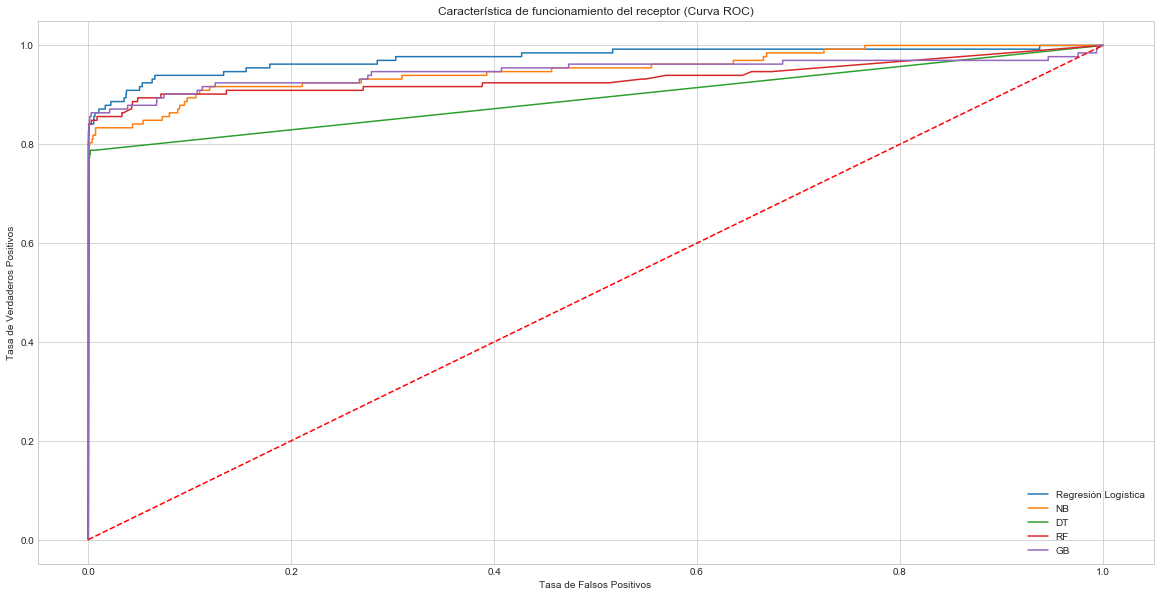

In [0]:
plt.figure(figsize=(20,10))
plt.plot(logit_fpr, logit_tpr, label='Regresión Logística')
plt.plot(NB_fpr, NB_tpr, label='NB')
# plt.plot(KNN_fpr, KNN_tpr, label='KNN')
plt.plot(DT_fpr, DT_tpr, label='DT')
plt.plot(RF_fpr, RF_tpr, label='RF')
plt.plot(GB_fpr, GB_tpr, label='GB')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Característica de funcionamiento del receptor (Curva ROC)')
plt.legend(loc="lower right")

### Ejercicio

Con la base de emails, verifique que se encuentra balanceada, sino balancee la base con cualquier técnica y muestre cuál es la mejor técnica para predecir si un correo es spam o no

In [0]:
#pi es a probabilidad de que el criterio de decisión tenga información relevante para la clasificación
# la ganancia de información mide la variación de la entropía ante adiciones de criterios de decisión
# GINI 